In [1]:
import numpy as np
import pathlib
import matplotlib.pyplot as plt
import functools

In [2]:
from read_raw import HST_read

In [3]:
from read_raw import HST_write

# files

In [4]:
data_dir = pathlib.Path('/home/users/jcasagrande/projects/tomo2seg/data')

pa66_dir = data_dir / "PA66GF30.v1"

pred_dir = "vol=PA66GF30.v1.set=test.model=paper-unet-2d.full-f32.fold000.1612-356-814.runid=1613-729-658"
pred_dir = data_dir / pred_dir

In [5]:
data_filepath = pa66_dir / "PA66GF30.v1.test.raw"
labels_filepath = pa66_dir / "PA66GF30.v1.labels-refined3.test.raw"

In [6]:
prediction_filepath = "vol=PA66GF30.v1.set=test.model=paper-unet-2d.full-f32.fold000.1612-356-814.runid=1613-729-658.predictions.raw"
prediction_filepath = pred_dir / prediction_filepath

# load

In [7]:
read = functools.partial(
    HST_read, data_type=np.uint8, 
)

volumes = dict(
    data = read(str(data_filepath)),
    labels = read(str(labels_filepath)),
    prediction = read(str(prediction_filepath)),
)

# check

In [8]:
for name, volume in volumes.items():
    print(f"{name=}", f"{volume.shape=}")

name='data' volume.shape=(1300, 1040, 300)
name='labels' volume.shape=(1300, 1040, 300)
name='prediction' volume.shape=(1300, 1040, 300)


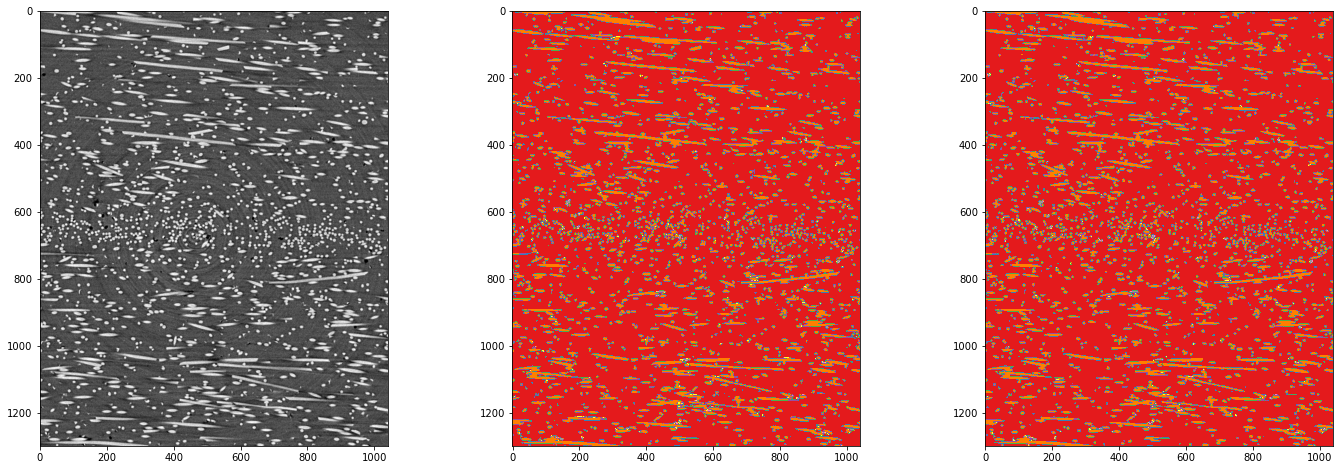

In [9]:
z_slice = 100

data_slice = volumes['data'][:, :, z_slice]
labels_slice = volumes['labels'][:, :, z_slice]
prediction_slice = volumes['prediction'][:, :, z_slice]

fig, axs = plt.subplots(
    nrows := 1, ncols := 3, 
    figsize = (ncols * (size := 8), nrows * size),
)

axs[0].imshow(data_slice, cmap='gray', vmin=0, vmax=255)
axs[1].imshow(labels_slice, cmap='Set1', vmin=0, vmax=2)
axs[2].imshow(prediction_slice, cmap='Set1', vmin=0, vmax=2)

# reduce

In [10]:
m = 150
M = 662
(.25*m+.75*M, .75*m+.25*M)

(534.0, 278.0)

In [11]:
volumes_reduced = {
    volname: vol[428:684, 278:534, 0:256]
    for volname, vol in volumes.items()
}

# re-check

In [12]:
for name, volume in volumes_reduced.items():
    print(f"{name=}", f"{volume.shape=}")

name='data' volume.shape=(256, 256, 256)
name='labels' volume.shape=(256, 256, 256)
name='prediction' volume.shape=(256, 256, 256)


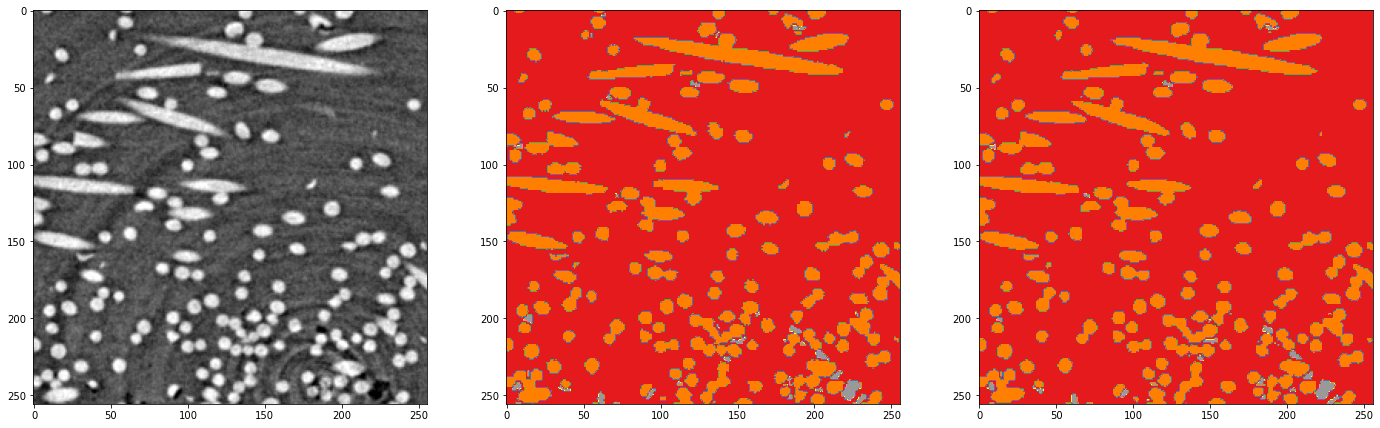

In [13]:
z_slice = 100

data_slice = volumes_reduced['data'][:, :, z_slice]
labels_slice = volumes_reduced['labels'][:, :, z_slice]
prediction_slice = volumes_reduced['prediction'][:, :, z_slice]

fig, axs = plt.subplots(
    nrows := 1, ncols := 3, 
    figsize = (ncols * (size := 8), nrows * size),
)

axs[0].imshow(data_slice, cmap='gray', vmin=0, vmax=255)
axs[1].imshow(labels_slice, cmap='Set1', vmin=0, vmax=2)
axs[2].imshow(prediction_slice, cmap='Set1', vmin=0, vmax=2)

# save

In [14]:
output_dir = data_dir / "pa66_256"

In [15]:
assert output_dir.is_dir()

In [18]:
for volname, vol in volumes_reduced.items():

    print(f"writing {volname=}")
    
    filename = f"{volname}.reduced.raw"
    print(f"{filename=}")
    
    filepath = output_dir / filename
    print(f"{filepath=}")
    
    HST_write(vol, str(filepath))

writing volname='data'
filename='data.reduced.raw'
filepath=PosixPath('/home/users/jcasagrande/projects/tomo2seg/data/pa66_256/data.reduced.raw')
opening /home/users/jcasagrande/projects/tomo2seg/data/pa66_256/data.reduced.raw for writing in mode w
volume size is 256x256x256
data type is uint8
writing .info file
done with writing
writing volname='labels'
filename='labels.reduced.raw'
filepath=PosixPath('/home/users/jcasagrande/projects/tomo2seg/data/pa66_256/labels.reduced.raw')
opening /home/users/jcasagrande/projects/tomo2seg/data/pa66_256/labels.reduced.raw for writing in mode w
volume size is 256x256x256
data type is uint8
writing .info file
done with writing
writing volname='prediction'
filename='prediction.reduced.raw'
filepath=PosixPath('/home/users/jcasagrande/projects/tomo2seg/data/pa66_256/prediction.reduced.raw')
opening /home/users/jcasagrande/projects/tomo2seg/data/pa66_256/prediction.reduced.raw for writing in mode w
volume size is 256x256x256
data type is uint8
writing .

# load back (to verify they're correct)

In [19]:
volumes_reloaded = dict(
    data = read(str(output_dir / "data.reduced.raw")),
    labels = read(str(output_dir / "labels.reduced.raw")),
    prediction = read(str(output_dir / "prediction.reduced.raw")),
)

In [22]:
for name, volume in volumes_reloaded.items():
    print(f"{name=}", f"{volume.shape=}")

name='data' volume.shape=(256, 256, 256)
name='labels' volume.shape=(256, 256, 256)
name='prediction' volume.shape=(256, 256, 256)


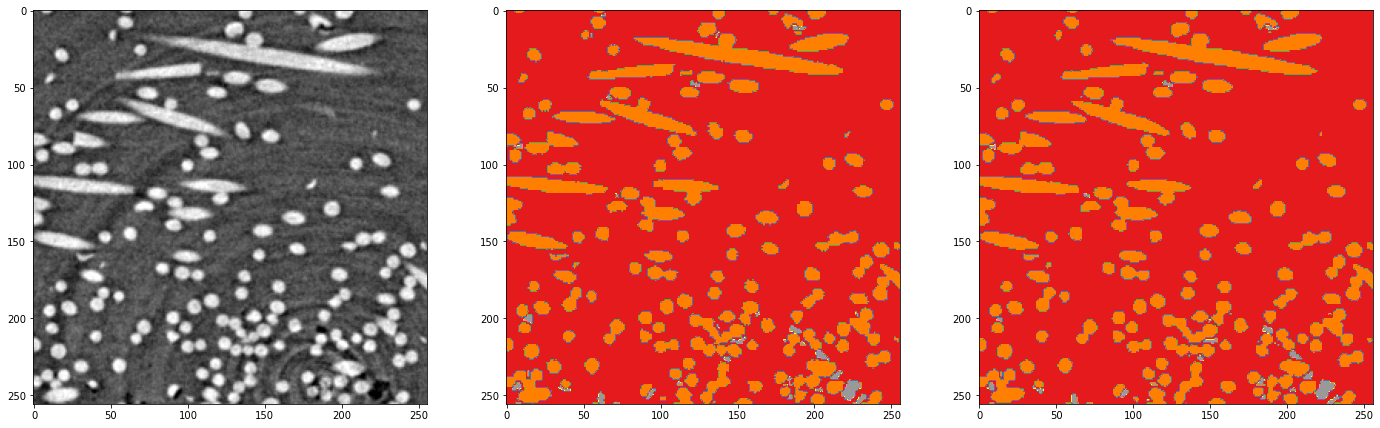

In [23]:
z_slice = 100

data_slice = volumes_reloaded['data'][:, :, z_slice]
labels_slice = volumes_reloaded['labels'][:, :, z_slice]
prediction_slice = volumes_reloaded['prediction'][:, :, z_slice]

fig, axs = plt.subplots(
    nrows := 1, ncols := 3, 
    figsize = (ncols * (size := 8), nrows * size),
)

axs[0].imshow(data_slice, cmap='gray', vmin=0, vmax=255)
axs[1].imshow(labels_slice, cmap='Set1', vmin=0, vmax=2)
axs[2].imshow(prediction_slice, cmap='Set1', vmin=0, vmax=2)

good (: